In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

## We can use the read_csv() function to load the data and combine the first two columns into a single date-time column that we can use as an index.

In [4]:
data = pd.read_csv("household_power_consumption.txt", sep=";", parse_dates=[['Date', 'Time']])

In [5]:
df = data.copy()
df

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


## Rename Columns & Handle Missing Data

In [6]:
df.rename(columns = {"Date_Time": "datetime", "Global_active_power": "gap", "Global_reactive_power": "grp", "Voltage" : "voltage",
                     "Global_intensity": "gi", "Sub_metering_1": "sm1", "Sub_metering_2" : "sm2", "Sub_metering_3" :"sm3" }, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1   gap       object        
 2   grp       object        
 3   voltage   object        
 4   gi        object        
 5   sm1       object        
 6   sm2       object        
 7   sm3       float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [8]:
#Chech for Nan/missing values
df.isna().any()

datetime    False
gap         False
grp         False
voltage     False
gi          False
sm1         False
sm2         False
sm3          True
dtype: bool

In [9]:
#Filling missing data by imputation - Backward fill
df = df.fillna(method='bfill')
df.isnull().sum()

datetime    0
gap         0
grp         0
voltage     0
gi          0
sm1         0
sm2         0
sm3         0
dtype: int64

In [10]:
#Recheck missing values
df.isna().any()

datetime    False
gap         False
grp         False
voltage     False
gi          False
sm1         False
sm2         False
sm3         False
dtype: bool

In [11]:
#Further examination shows there are special characters (?) representing missing values in the dataset
df[6835:6845]

,datetime,gap,grp,voltage,gi,sm1,sm2,sm3
6835,2006-12-21 11:19:00,0.244,0.000,242.050,1.000,0.000,0.000,0.0
6836,2006-12-21 11:20:00,0.244,0.000,242.080,1.000,0.000,0.000,0.0
6837,2006-12-21 11:21:00,0.242,0.000,241.670,1.000,0.000,0.000,0.0
6838,2006-12-21 11:22:00,0.244,0.000,242.290,1.000,0.000,0.000,0.0
6839,2006-12-21 11:23:00,?,?,?,?,?,?,0.0
6840,2006-12-21 11:24:00,?,?,?,?,?,?,0.0
6841,2006-12-21 11:25:00,0.246,0.000,241.740,1.000,0.000,0.000,0.0
6842,2006-12-21 11:26:00,0.246,0.000,241.830,1.000,0.000,0.000,0.0
6843,2006-12-21 11:27:00,0.244,0.000,240.960,1.000,0.000,0.000,0.0
6844,2006-12-21 11:28:00,0.244,0.000,241.370,1.000,0.000,0.000,0.0


In [12]:
#replace "?" with Nan
df = df.replace('?', np.nan)

In [13]:
#Filling Nan by imputation - Forward fill
df = df.fillna(method='bfill')
df.isnull().sum()

datetime    0
gap         0
grp         0
voltage     0
gi          0
sm1         0
sm2         0
sm3         0
dtype: int64

In [14]:
#Convert column types  to floats 
df.iloc[:, 1:] = df.iloc[:, 1:].astype("float")

In [15]:
#Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1   gap       float64       
 2   grp       float64       
 3   voltage   float64       
 4   gi        float64       
 5   sm1       float64       
 6   sm2       float64       
 7   sm3       float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


## More Preprocessing¶

In [16]:
df_power = df.copy()
df_power.head()

,datetime,gap,grp,voltage,gi,sm1,sm2,sm3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [17]:
#Create Sum of Sub Metering for each hour
# total submetering value (measured in watt-hour of active energy) of a houseld.
df_power["sum_sm"] = df_power.iloc[:, 5:].sum(axis=1)
df_power["sum_sm"] = round(df_power["sum_sm"], 1)

In [18]:
df_power.head()

,datetime,gap,grp,voltage,gi,sm1,sm2,sm3,sum_sm
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0


In [19]:
#Set datetime as index
df_power.set_index("datetime", inplace = True)

In [20]:
df_power.head()

,gap,grp,voltage,gi,sm1,sm2,sm3,sum_sm
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0


## Profiling & Visualization

Text(0, 0.5, 'Sub Metering')

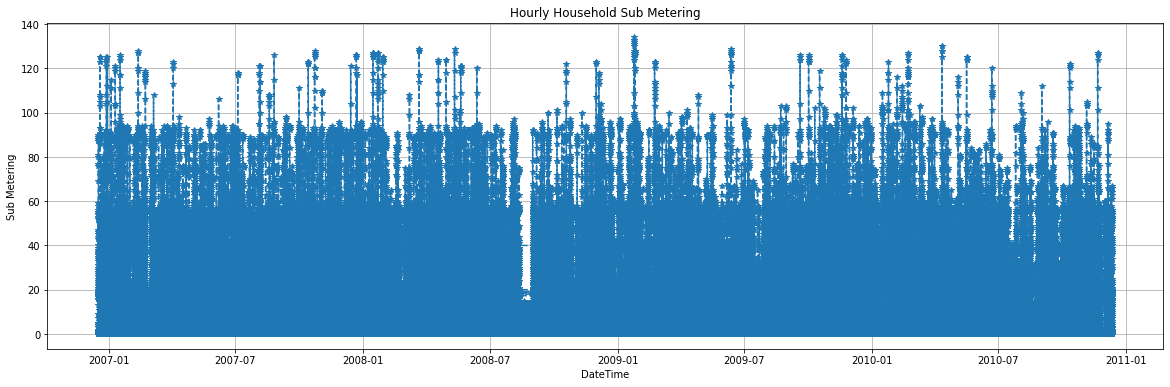

In [21]:
#Plot datetime X  average sub metering
plt.figure(figsize=(20,6))
plt.plot(df_power.index, df_power.sum_sm, '--', marker='*', )
plt.grid()
plt.title("Hourly Household Sub Metering")
plt.xlabel('DateTime')
plt.ylabel('Sub Metering')

In [22]:
# Okay, Let's Make sense of this by Resampling the data into daily & weekly data
df_power.isna().sum()

gap        0
grp        0
voltage    0
gi         0
sm1        0
sm2        0
sm3        0
sum_sm     0
dtype: int64

In [23]:
#Resample to daily data
df_daily = df_power.resample("D").mean()

In [24]:
df_daily.shape

(1457, 8)

Text(0, 0.5, 'Sub Metering')

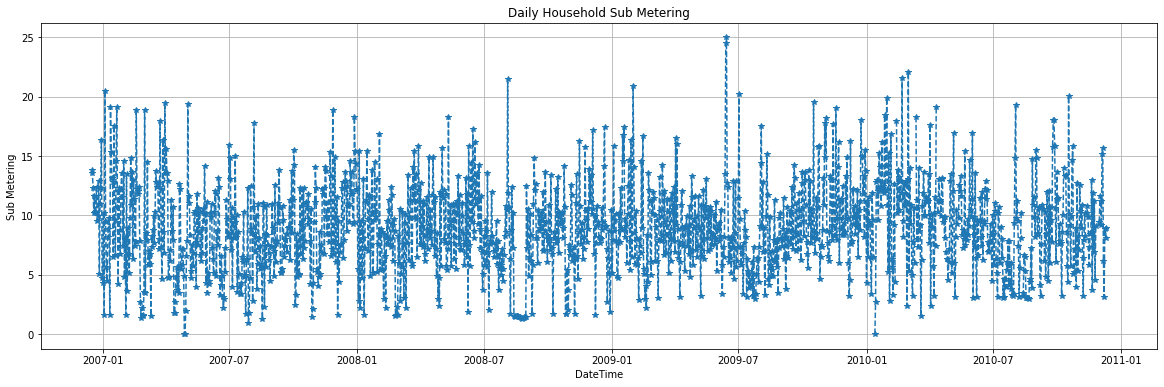

In [25]:
#Plot Daily datetime X  average sub metering
plt.figure(figsize=(20,6))
plt.plot(df_daily.index, df_daily.sum_sm, '--', marker='*', )
plt.grid()
plt.title("Daily Household Sub Metering")
plt.xlabel('DateTime')
plt.ylabel('Sub Metering')

In [26]:
#Resample to Weekly data
df_weekly = df_daily.resample("W").mean()

In [27]:
df_weekly.shape

(209, 8)

Text(0, 0.5, 'Sub Metering')

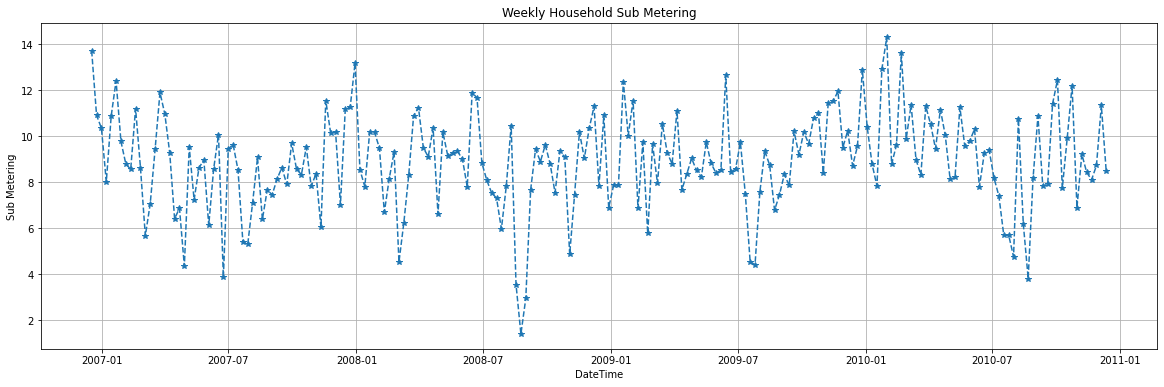

In [28]:
#Plot datetime X  average sub metering
plt.figure(figsize=(20,6))
plt.plot(df_weekly.index, df_weekly.sum_sm, '--', marker='*', )
plt.grid()
plt.title("Weekly Household Sub Metering")
plt.xlabel('DateTime')
plt.ylabel('Sub Metering')

## Seasonality & Trend¶

In [29]:
df_seas = pd.DataFrame(df_power["sum_sm"])
df_seas.head()

,sum_sm
datetime,
2006-12-16 17:24:00,18.0
2006-12-16 17:25:00,17.0
2006-12-16 17:26:00,19.0
2006-12-16 17:27:00,18.0
2006-12-16 17:28:00,18.0


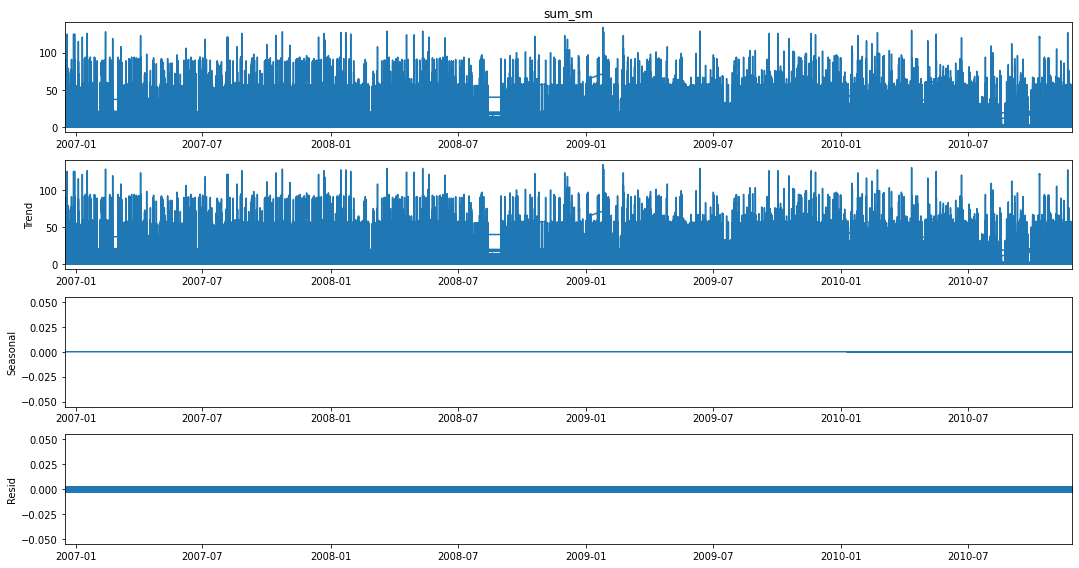

In [30]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(x = df_seas["sum_sm"], model='additive', period = 1)
decompose_series.plot()
plt.show()

In [31]:
#Interpolate Missing values for daily dataset
df_d = df_daily.sum_sm.interpolate()
df_d = pd.DataFrame(df_d)

In [32]:
df_d

,sum_sm
datetime,
2006-12-16,13.818182
2006-12-17,13.584028
2006-12-18,12.293056
2006-12-19,10.165278
2006-12-20,11.604861
...,...
2010-12-07,6.120833
2010-12-08,3.122222
2010-12-09,8.872222


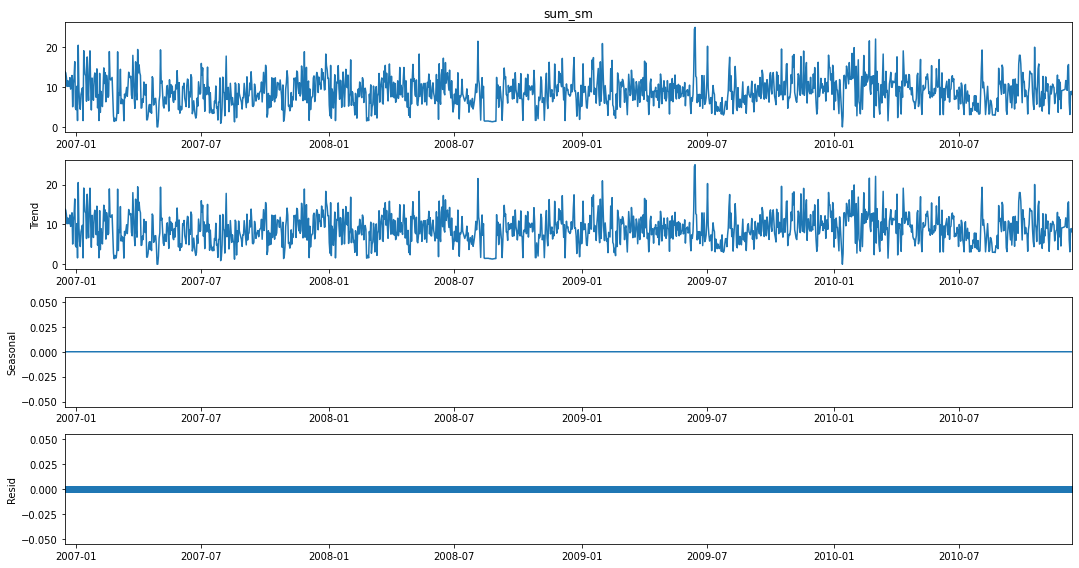

In [33]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(x = df_d["sum_sm"], model='additive', period = 1)
decompose_series.plot()
plt.show()

In [34]:
#Interpolate Missing values for weekly dataset
df_w = df_weekly.sum_sm.interpolate()
df_w = pd.DataFrame(df_w)

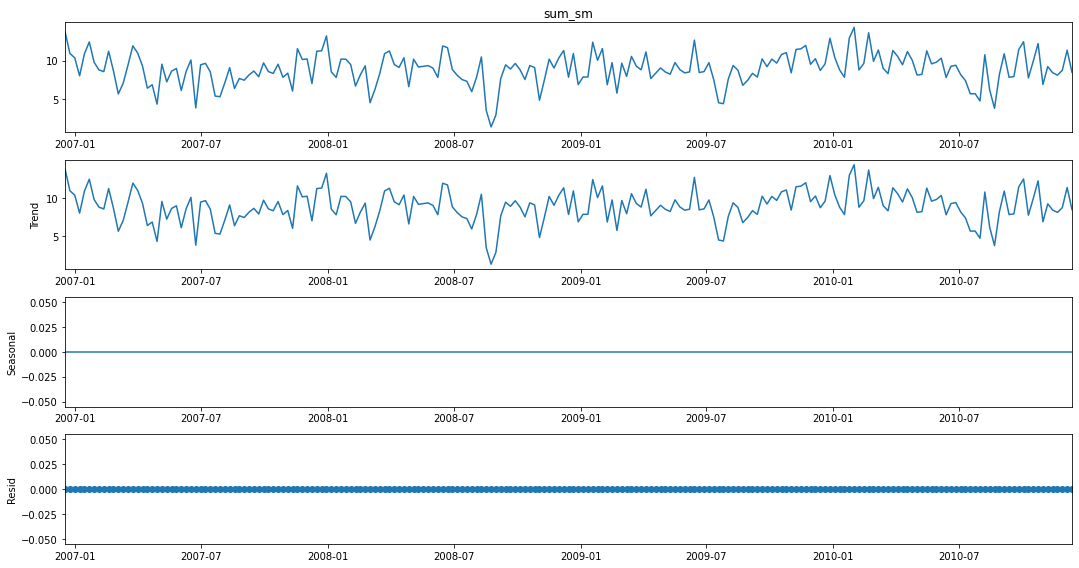

In [35]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(x = df_w["sum_sm"], model='additive', period = 1)
decompose_series.plot()
plt.show()

In [36]:
# So Yeah, It's a stationary data. No Seasonality and no definite trend

In [37]:
#Statistical check for seasonality & Trend Daily

from statsmodels.tsa.stattools import adfuller
adf = adfuller(df_d['sum_sm'])
print(f'ADF Statistic: {adf[0]}')
print(f'p-value: {adf[1]}')
print(f'No. of lags used: {adf[2]}')
print(f'No. of observations used : {adf[3]}')
print('Critical Values:')
for k, v in adf[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: -14.14323683103598
p-value: 2.2270661864953093e-26
No. of lags used: 3
No. of observations used : 1453
Critical Values:
   1%: -3.434858527373781
   5%: -2.8635312133080046
   10%: -2.567830105465636


In [38]:
# pvalue is less than 0.05, hence data is STATIONARY

In [39]:
#Statistical check for seasonality & Trend Weekly

from statsmodels.tsa.stattools import adfuller
adf = adfuller(df_w['sum_sm'])
print(f'ADF Statistic: {adf[0]}')
print(f'p-value: {adf[1]}')
print(f'No. of lags used: {adf[2]}')
print(f'No. of observations used : {adf[3]}')
print('Critical Values:')
for k, v in adf[4].items():
    print(f'   {k}: {v}') 


ADF Statistic: -5.008753492739286
p-value: 2.132468847967427e-05
No. of lags used: 3
No. of observations used : 205
Critical Values:
   1%: -3.4626576734812318
   5%: -2.8757444215841326
   10%: -2.5743412314098753


In [40]:
# pvalue is less than 0.05, hence data is STATIONARY

## Autocorrelation & Partial Functions

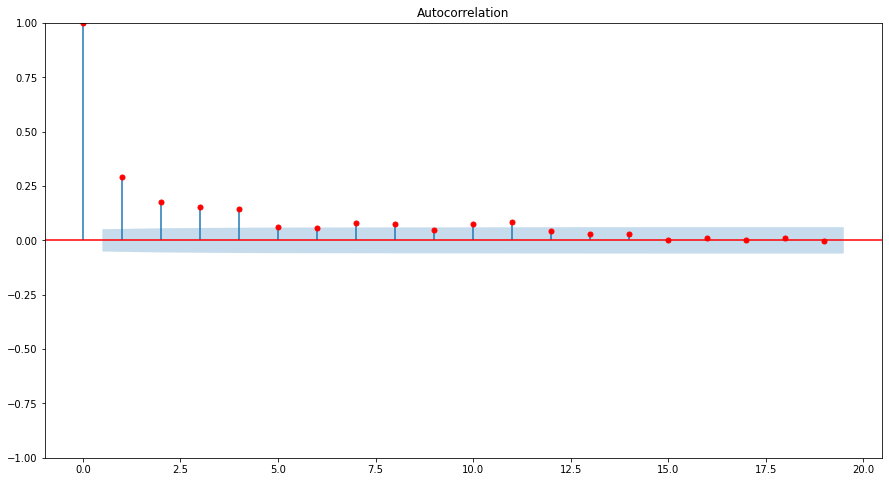

In [42]:
#acf Daily
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF
plot_acf(df_d, lags = range(0, 20), color='red')
plt.show()

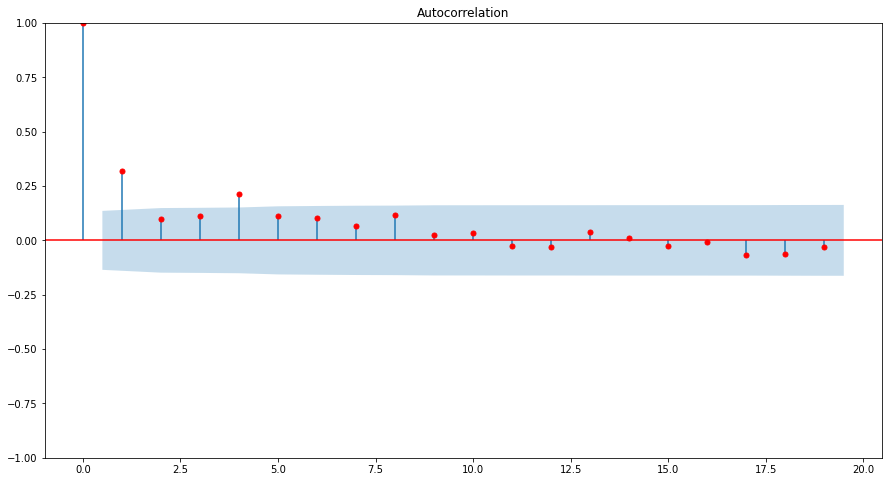

In [43]:
#acf Weekly
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF
plot_acf(df_w, lags = range(0, 20), color='red')
plt.show()

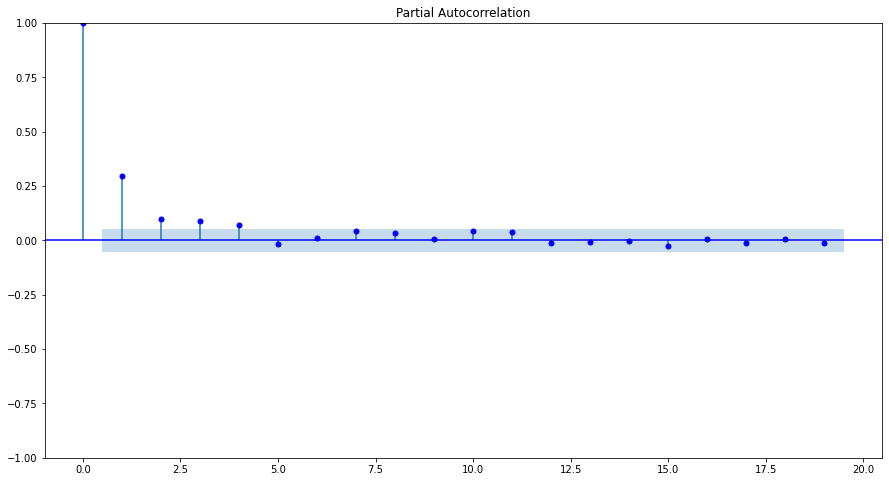

In [44]:
#PACF Daily
plot_pacf(df_d, lags = range(0, 20), color="blue")
plt.show()

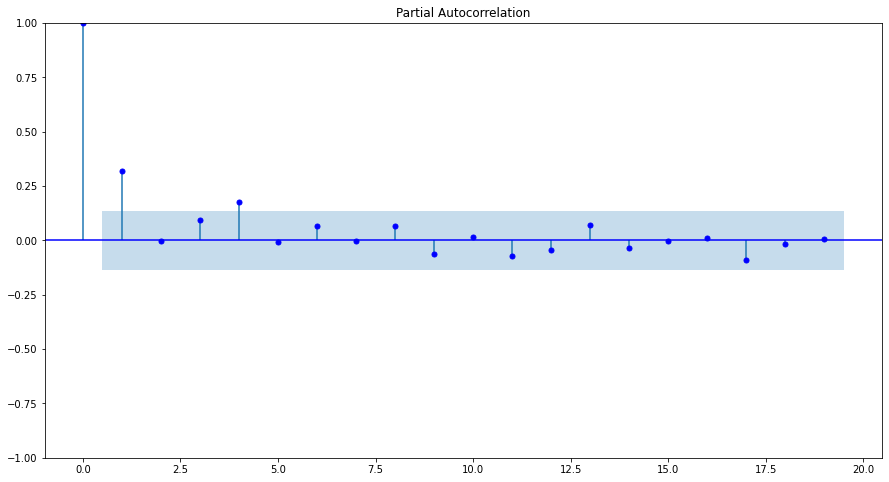

In [45]:
#PACF Weekly
plot_pacf(df_w, lags = range(0, 20), color="blue")
plt.show()

## Models

In [56]:
# load all data
energy = pd.read_csv('household_power_consumption.txt',sep=';', na_values="?")

Text(0.5, 1.0, 'Single Household Energy Consumption Hourly')

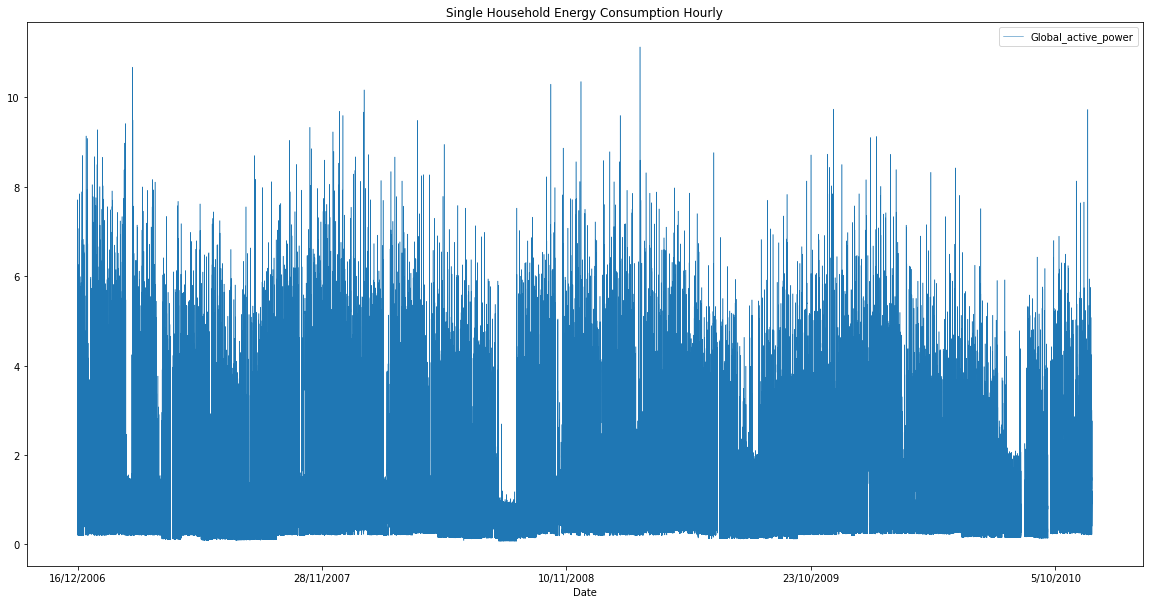

In [57]:
from matplotlib.pyplot import figure

energy.plot(x='Date',y='Global_active_power',lw = 0.5,figsize=(20,10))
plt.title("Single Household Energy Consumption Hourly")

In [59]:
dtypes = {'Date': str,
          'Time': str,
          'Global_active_power': float,
          'Global_reactive_power': float,
          'Voltage': float,
          'Global_intensity': float,
          'Sub_metering_1': float,
          'Sub_metering_2': float,
          'Sub_metering_3': float}

#Deal with missing values
energy = energy.fillna(method='ffill')

In [60]:
energy.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [61]:
#Insert additional columns
energy.insert(0, 'Date_Time', pd.to_datetime(energy['Date'] + ' ' + energy['Time'])) #datetime format
energy.insert(2, 'Year',energy['Date_Time'].dt.year) #year
energy.insert(3, 'Month',energy['Date_Time'].dt.month) #month
energy.insert(4, 'Day',energy['Date_Time'].dt.weekday) #weekday_name
energy.insert(5, 'Hour',energy['Date_Time'].dt.hour) #hour

#Exclude other numerical variables (univariate analysis)
energy = energy.iloc[:,0:8]

#Preview data
energy.head()

,Date_Time,Date,Year,Month,Day,Hour,Time,Global_active_power
0,2006-12-16 17:24:00,16/12/2006,2006,12,5,17,17:24:00,4.216
1,2006-12-16 17:25:00,16/12/2006,2006,12,5,17,17:25:00,5.360
2,2006-12-16 17:26:00,16/12/2006,2006,12,5,17,17:26:00,5.374
3,2006-12-16 17:27:00,16/12/2006,2006,12,5,17,17:27:00,5.388
4,2006-12-16 17:28:00,16/12/2006,2006,12,5,17,17:28:00,3.666


In [62]:
np.round(energy['Global_active_power'].describe(), 2).apply(lambda x: format(x, 'f'))

count    2075259.000000
mean           1.090000
std            1.050000
min            0.080000
25%            0.310000
50%            0.600000
75%            1.520000
max           11.120000
Name: Global_active_power, dtype: object

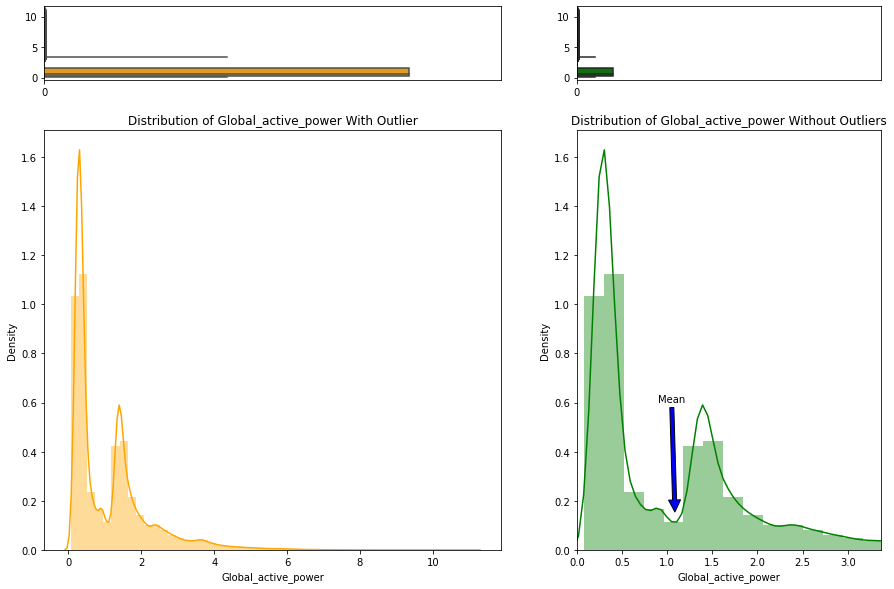

In [63]:
# Create subplots
f, axes = plt.subplots(2,
                       2, 
                       figsize=(15, 10), 
                       sharex=False, 
                       gridspec_kw={"height_ratios": (.15, .85),"width_ratios":(.60,.40)})
#Main boxplot
sns.boxplot(energy["Global_active_power"] , color="orange", ax=axes[0,0])
axes[0,0].set_xlabel('')
axes[0,0].set_xlim(0, None)

#Main distribution
sns.distplot(energy["Global_active_power"] , color="orange", ax=axes[1,0])
axes[0,0].set_xlim(0, None)
axes[1,0].set_title('Distribution of Global_active_power With Outlier')

#Zoom boxplot
sns.boxplot(energy["Global_active_power"], color="green", ax=axes[0,1])
axes[0,1].set_xlabel('')
axes[0,1].set_xlim(0, 3.37)

#Zoom distribution
sns.distplot(energy["Global_active_power"], color="green", ax=axes[1,1])
axes[1,1].set_title('Distribution of Global_active_power Without Outliers')
axes[1,1].set_xlim(0, 3.37)

# Add an arrow to mark the mean value
axes[1,1].annotate(
'Mean', xy=(energy["Global_active_power"].mean(), .15), xytext=(.9, .6),
arrowprops=dict(facecolor='blue', shrink=0.01))

plt.show()

Text(0.5, 1.0, 'Single Household Energy Consumption Hourly')

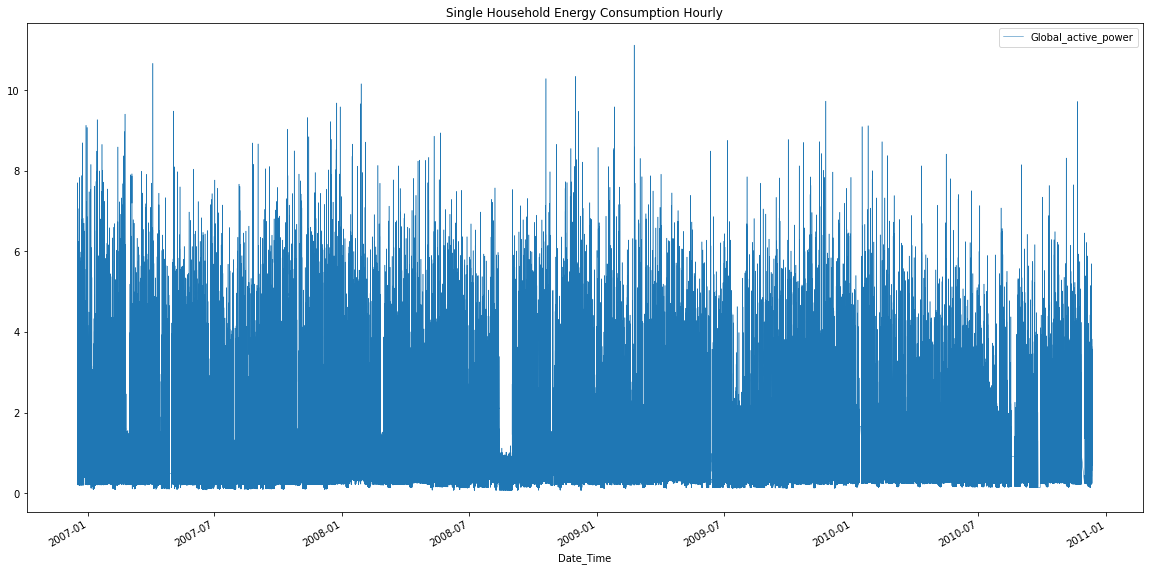

In [64]:
from matplotlib.pyplot import figure

energy.plot(x='Date_Time',y='Global_active_power',lw = 0.5,figsize=(20,10))
plt.title("Single Household Energy Consumption Hourly")

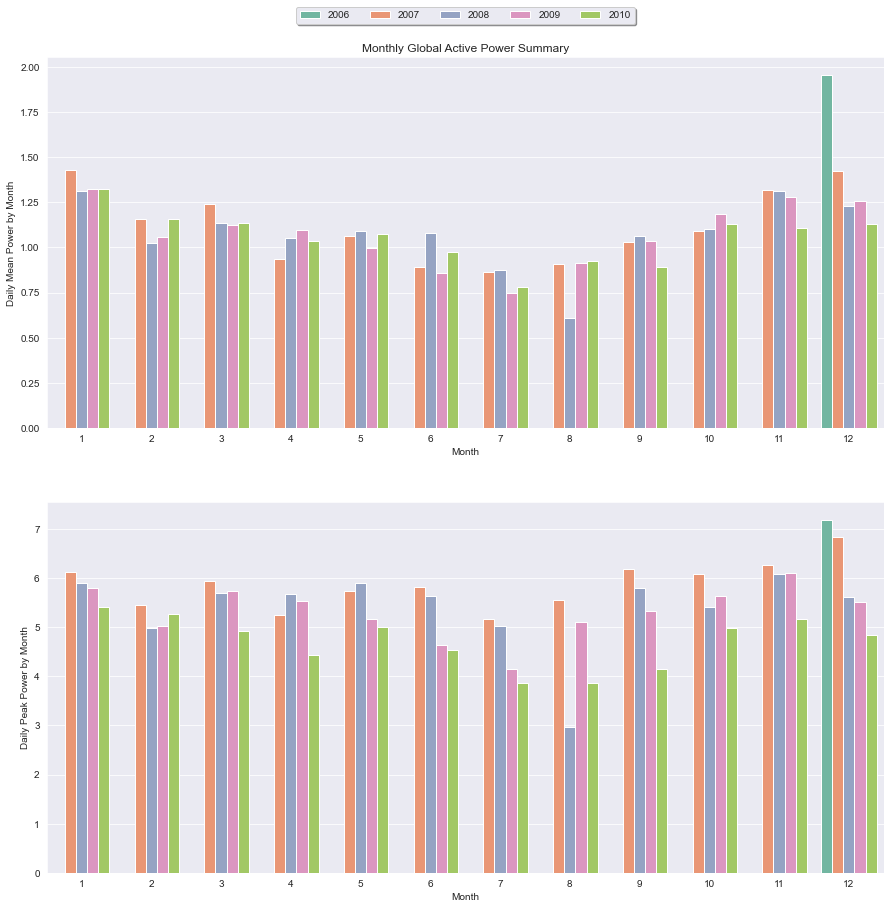

In [65]:
# Summarize power by month (mean, median, max)
energy_monthly_summary = (energy.groupby(['Year','Month','Date'],as_index=False).agg(**{'mean_active_power':('Global_active_power','mean'), \
                                                                            'median_active_power':('Global_active_power','median'), \
                                                                            'max_active_power':('Global_active_power','max')}))


# Create subplots
sns.set_style("darkgrid")
f, axes = plt.subplots(2, figsize=(15, 15), sharex=False)

# Monthly Mean subplot
mean = sns.barplot(x=energy_monthly_summary.Month,
            y=energy_monthly_summary.mean_active_power,
            hue=energy_monthly_summary.Year,
            palette="Set2",
            ax=axes[0],
            ci=None)
mean.set_title('Monthly Global Active Power Summary')
mean.set_ylabel('Daily Mean Power by Month')
mean.legend_.remove()

# Monthly Median subplot
#median = sns.barplot(x=energy_monthly_summary.Month,
#            y=energy_monthly_summary.median_active_power,
#            hue=energy_monthly_summary.Year,
#            palette="Set2",
#            ax=axes[1],
#            ci=None)
#median.legend_.remove()
#median.set_ylabel('Daily Median Power by Month')

# Monthly Peak subplot
max = sns.barplot(x=energy_monthly_summary.Month,
            y=energy_monthly_summary.max_active_power,
            hue=energy_monthly_summary.Year,
            palette="Set2",
            ax=axes[1],
            ci=None) 
max.set_ylabel('Daily Peak Power by Month')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 2.35), shadow=True, ncol=5)

In [66]:
#energy_monthly_summary

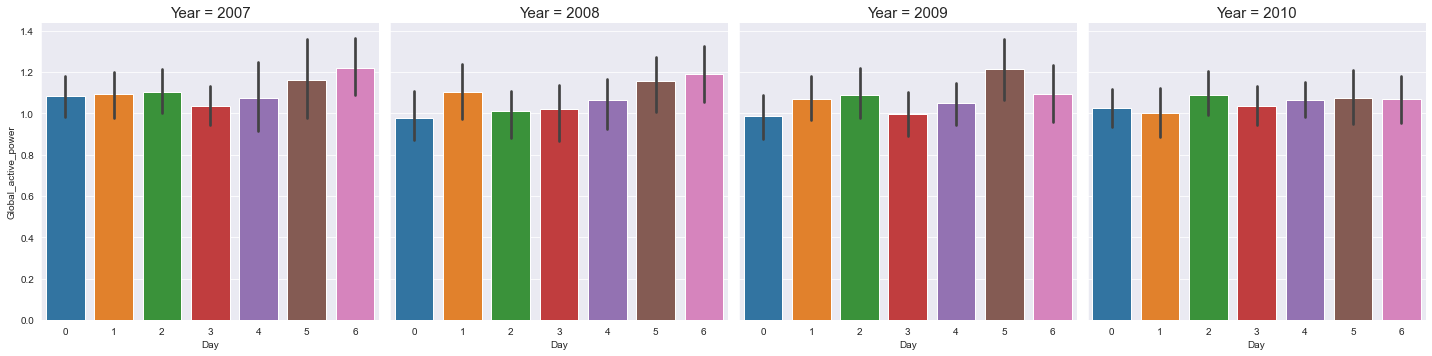

In [67]:
energy_weekday_summary = energy.groupby(by=['Year','Month','Day'], as_index=False)[['Global_active_power']].mean()

day_plot = sns.catplot(x="Day", y="Global_active_power", data=energy_weekday_summary.query("Year != 2006"), 
           kind="bar",
           col="Year")
day_plot.set_titles(size = 15)

In [68]:
from sklearn import preprocessing

#summarize by mean hourly energy
energy_hourly_summary = energy.groupby(
    by=['Year','Month','Day',"Hour"], as_index=False)[['Global_active_power']].mean()

#create the Label Encoder object
le = preprocessing.LabelEncoder()

#encode categorical data
energy_hourly_summary['Year'] = le.fit_transform(energy_hourly_summary['Year'])
energy_hourly_summary.head()

,Year,Month,Day,Hour,Global_active_power
0,0,12,0,0,0.637967
1,0,12,0,1,0.760033
2,0,12,0,2,0.361233
3,0,12,0,3,0.449950
4,0,12,0,4,0.802500


In [69]:
from sklearn.model_selection import train_test_split
x = energy_hourly_summary[['Year','Month','Day','Hour']]
y = energy_hourly_summary.Global_active_power
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.75, test_size = 0.25, random_state=1)

## Seasonal Autoregressive Integrated Moving Average (SARIMA)¶

## Weekly

In [93]:
indexed_engery = energy[['Date_Time','Global_active_power', 'Year', 'Month']].set_index('Date_Time');
train = indexed_engery[indexed_engery['Year'] < 2010] #train set is years 2006 - 2009
test = indexed_engery[indexed_engery['Year'] == 2010] #test set is year 2010

In [103]:
# Define test and train data for weekly power consumption
train_weekly=train[['Global_active_power']].resample('W').mean() 
test_weekly=test[['Global_active_power']].resample('W').mean() 
print('\nShape of Train Dataset = (%s, %s)'%(train_weekly.shape))
print('\nShape of Test Dataset = (%s, %s)'%(test_weekly.shape))


Shape of Train Dataset = (160, 1)

Shape of Test Dataset = (50, 1)


In [121]:
#fitting SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
model1 = SARIMAX(train_weekly, order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 100), #100 = number of weeks that we are forcasting
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model1.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [105]:
results.forecast()

2010-01-10    0.924668
Freq: W-SUN, dtype: float64

In [106]:
predictions = results.predict(start='2010-01-03', end='2010-12-19')
predictions.shape

(51,)

## Evaluation

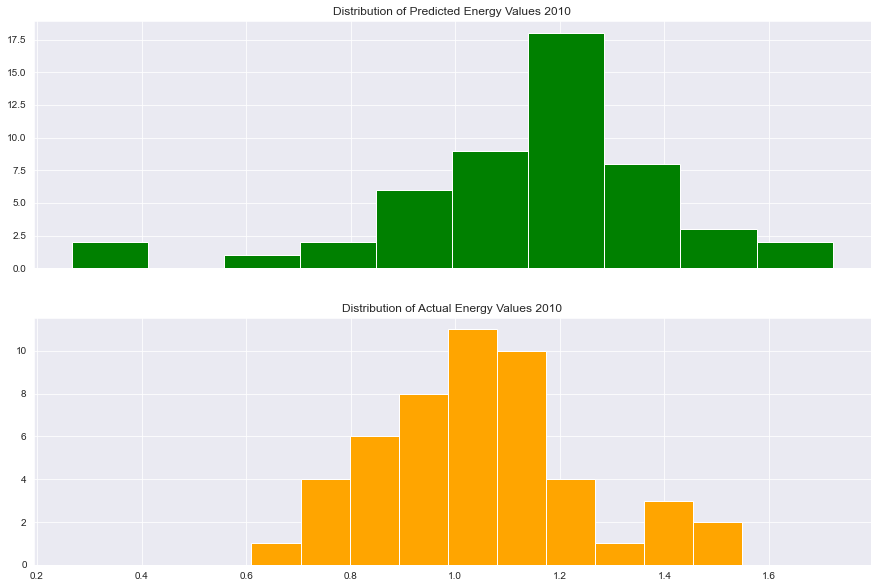

In [107]:
# predictions.index
f, axes = plt.subplots(2, figsize=(15, 10), sharex=True)
axes[0].hist(predictions.values, bins=10,color='green')
axes[0].set_title("Distribution of Predicted Energy Values 2010")
axes[1].hist((test[['Global_active_power']].resample('W').mean().values), bins=10,color='Orange')
axes[1].set_title("Distribution of Actual Energy Values 2010")
plt.show()

In [108]:
#merge on Date_Time
test[['Global_active_power']].resample('W').mean().reset_index()
prediction = pd.DataFrame(predictions).reset_index()
prediction.columns = ['Date_Time','Global_active_power']

res = pd.merge(test[['Global_active_power']].resample('W').mean(), 
               prediction, 
               how='left', 
               on='Date_Time')

res.columns = ['Date_Time','actual','predictions']
res.insert(3, 'residuals', res['actual'] - res['predictions']) #residuals
res.head()


,Date_Time,actual,predictions,residuals
0,2010-01-03,0.976101,1.285106,-0.309005
1,2010-01-10,0.920572,0.924668,-0.004096
2,2010-01-17,1.451530,1.331707,0.119823
3,2010-01-24,1.535291,1.302757,0.232535
4,2010-01-31,1.548028,0.782211,0.765818


In [109]:
#MSE
print("MSE = ", np.mean(res['residuals']**2)) #MSE
print("RMSE = ", np.sqrt(np.mean(res['residuals']**2))) #RMSE

MSE =  0.07010820319470536
RMSE =  0.2647795369636886


In [110]:
# accuracy measures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

MSE = mean_squared_error(res['actual'], res['predictions'])
MAE = mean_absolute_error(res['actual'], res['predictions'])
R2 = r2_score(res['actual'], res['predictions'])
RMSE = math.sqrt(MSE)
#print("RMSE:\n",RMSE)
print(f'\nMSE : {MSE}, RMSE : {RMSE}, MAE: {MAE}, R2: {R2}\n ')


MSE : 0.07010820319470536, RMSE : 0.2647795369636886, MAE: 0.198705764838187, R2: -0.7503334107574453
 


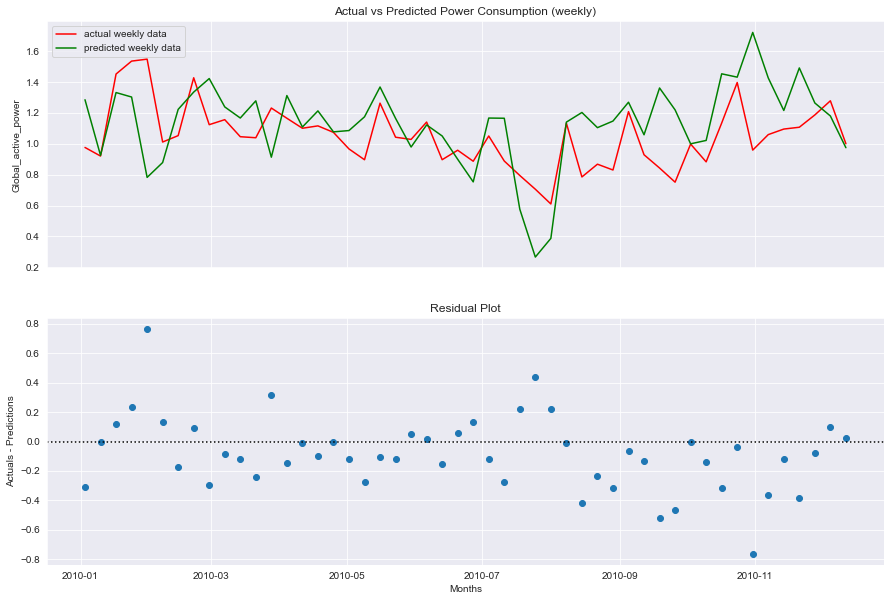

In [111]:
f, axes = plt.subplots(2, figsize=(15, 10), sharex=True)

#plot of actual vs predictions
axes[0].plot(res['Date_Time'],res['actual'], color='red', label='actual weekly data')
axes[0].plot(res['Date_Time'],res['predictions'], color='green', label='predicted weekly data')
axes[0].set_title('Actual vs Predicted Power Consumption (weekly)')
axes[0].set_ylabel('Global_active_power')
axes[0].legend()

#plot of actual - predictions
axes[1].scatter(res['Date_Time'],(res['actual'] - res['predictions']))
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Actuals - Predictions')
axes[1].axhline(y=0, color='black', linestyle=':')

plt.show()


## Daily 

In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
train_daily=train[['Global_active_power']].resample('D').mean()
model1 = SARIMAX(train_monthly, order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 100), #100 = number of weeks that we are forcasting
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model1.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [84]:
results.forecast()

2010-01-01    1.515435
Freq: D, dtype: float64

In [85]:
predictions = results.predict(start='2010-01-03', end='2010-12-19')

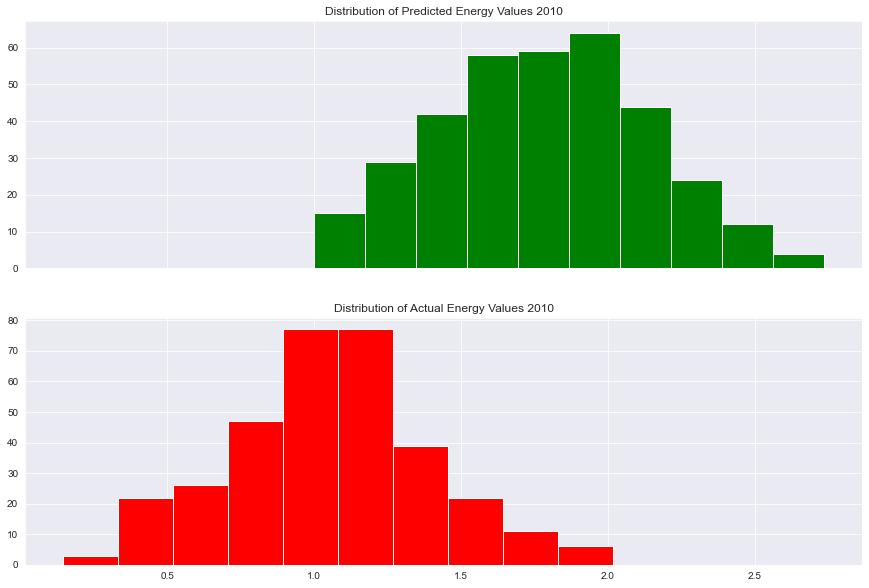

In [86]:
# predictions.index
f, axes = plt.subplots(2, figsize=(15, 10), sharex=True)
axes[0].hist(predictions.values, bins=10,color='green')
axes[0].set_title("Distribution of Predicted Energy Values 2010")
axes[1].hist((test[['Global_active_power']].resample('D').mean().values), bins=10,color='Red')
axes[1].set_title("Distribution of Actual Energy Values 2010")
plt.show()

In [87]:
#merge on Date_Time
test[['Global_active_power']].resample('D').mean().reset_index()
prediction = pd.DataFrame(predictions).reset_index()
prediction.columns = ['Date_Time','Global_active_power']

res = pd.merge(test[['Global_active_power']].resample('W').mean(), 
               prediction, 
               how='left', 
               on='Date_Time')

res.columns = ['Date_Time','actual','predictions']
res.insert(3, 'residuals', res['actual'] - res['predictions']) #residuals
res.head()

,Date_Time,actual,predictions,residuals
0,2010-01-03,0.976101,1.166756,-0.190655
1,2010-01-10,0.920572,1.595875,-0.675303
2,2010-01-17,1.451530,1.447374,0.004156
3,2010-01-24,1.535291,1.122098,0.413194
4,2010-01-31,1.548028,1.269914,0.278114


In [88]:
#MSE
print("MSE = ", np.mean(res['residuals']**2)) #MSE

MSE =  0.7610202218583153


In [91]:
# accuracy measures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

MSE = mean_squared_error(res['actual'], res['predictions'])
MAE = mean_absolute_error(res['actual'], res['predictions'])
R2 = r2_score(res['actual'], res['predictions'])
RMSE = math.sqrt(MSE)
#print("RMSE:\n",RMSE)
print(f'\nMSE : {MSE}, RMSE : {RMSE}, MAE: {MAE}, R2: {R2}\n')


MSE : 0.7610202218583153, RMSE : 0.8723647298339814, MAE: 0.7627667944549564, R2: -17.999761224535987



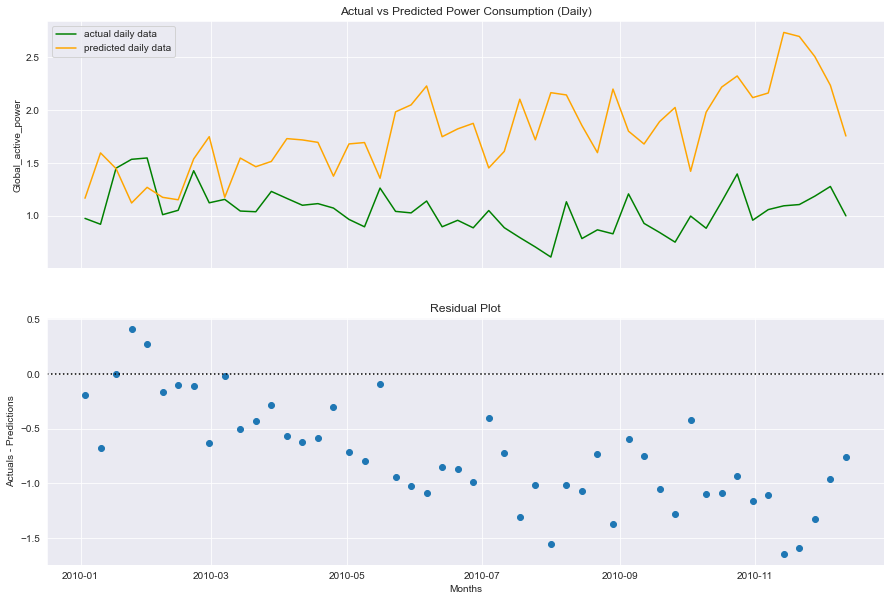

In [92]:
f, axes = plt.subplots(2, figsize=(15, 10), sharex=True)

#plot of actual vs predictions
axes[0].plot(res['Date_Time'],res['actual'], color='Green', label='actual daily data')
axes[0].plot(res['Date_Time'],res['predictions'], color='Orange', label='predicted daily data')
axes[0].set_title('Actual vs Predicted Power Consumption (Daily)')
axes[0].set_ylabel('Global_active_power')
axes[0].legend()

#plot of actual - predictions
axes[1].scatter(res['Date_Time'],(res['actual'] - res['predictions']))
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Actuals - Predictions')
axes[1].axhline(y=0, color='black', linestyle=':')

plt.show()


